In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from ta.utils import dropna
from ta.trend import SMAIndicator

In [18]:
# Load data
data = yf.download("EURUSD=x", period="max", interval="1h")
data.index = pd.to_datetime(data.index)
data = data.drop(columns=['Adj Close', 'Volume'])
data = dropna(data)

[*********************100%%**********************]  1 of 1 completed


In [19]:
  # Initialize SMA Indicator
sma_10 = SMAIndicator(close=data["Close"], window=10)
sma_100 = SMAIndicator(close=data["Close"], window=100)
data['SMA_10'] = sma_10.sma_indicator()
data['SMA_100'] = sma_100.sma_indicator()

In [20]:
# Generate buy and sell signals
data['position'] = np.where(data['SMA_10'] > data['SMA_100'], 1, 0)
data['buy'] = np.where(data['SMA_10'] > data['SMA_100'], 1, 0)
data['sell'] = np.where(data['SMA_10'] < data['SMA_100'], -1, 0)

In [21]:
# Create a signal column
data['Signal'] = data['buy'] + data['sell']

# Print the result
data

,Open,High,Low,Close,SMA_10,SMA_100,buy,sell,Signal
Datetime,,,,,,,,,
2022-08-29 14:00:00+01:00,1.001101,1.002004,0.999900,1.001502,NaN,NaN,0,0,0
2022-08-29 15:00:00+01:00,1.001202,1.002908,0.998502,0.998602,NaN,NaN,0,0,0
2022-08-29 16:00:00+01:00,0.998702,1.000200,0.998403,0.999900,NaN,NaN,0,0,0
2022-08-29 17:00:00+01:00,0.999900,1.001803,0.999900,1.001703,NaN,NaN,0,0,0
2022-08-29 18:00:00+01:00,1.002205,1.002205,1.000901,1.001001,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...
2024-08-28 10:00:00+01:00,1.114455,1.114827,1.113710,1.113958,1.116048,1.115899,1,0,1
2024-08-28 11:00:00+01:00,1.113958,1.113958,1.112471,1.112842,1.115501,1.115881,0,-1,-1
2024-08-28 12:00:00+01:00,1.112842,1.113338,1.112100,1.112223,1.114954,1.115850,0,-1,-1


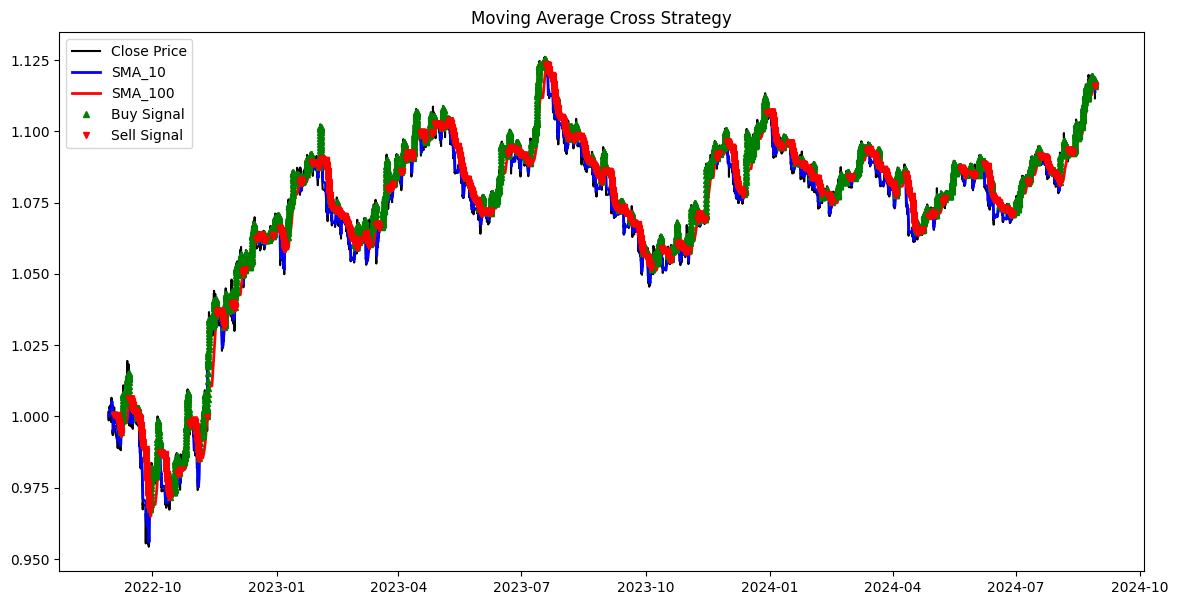

In [23]:
# Example visualization (optional)
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='black')
plt.plot(data['SMA_10'], label=f'SMA_10', color='blue', linewidth=2)
plt.plot(data['SMA_100'], label=f'SMA_100', color='red', linewidth=2)

# Plot buy and sell signals
plt.plot(data[data['Signal'] == 1].index, data['SMA_10'][data['Signal'] == 1], '^', markersize=5, color='g', label='Buy Signal')
plt.plot(data[data['Signal'] == -1].index, data['SMA_100'][data['Signal'] == -1], 'v', markersize=5, color='r', label='Sell Signal')

plt.title('Moving Average Cross Strategy')
plt.legend()
plt.show()
